# **SD-WAN Data Insights for ML Operations Analysis**

In this exercise, we will analyze a dataset collected from an SD-WAN network managed by a company’s operations center. The organization is facing an *increase in support complaints from end users reporting delays in their applications*, with incidents being reported from various locations and without a clear pattern that points to the root cause.

The dataset includes detailed information on device characteristics, software versions, and measurements related to performance such as CPU and memory utilization, packet loss, and temperature.

By leveraging Machine Learning algorithms such as K-Means clustering, we aim to uncover patterns and groupings within the device data. These insights can help the operations center to identify clusters of devices that may be experiencing similar issues, ultimately guiding targeted troubleshooting and improving end-user experience across the SD-WAN environment.

### **Objectives.**

- Load a dataset in .csv format.
- Explore the capabilities of the NumPy, Pandas, Matplotlib, and Seaborn libraries for data analysis and visualization


To begin, we'll establish a connection between this Jupyter Notebook and your Google Drive. This connection will enable us to access the dataset stored in your Drive

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Before starting our data exploration and analysis, let's briefly introduce the main libraries we’ll use for data manipulation, visualization, and machine learning in this SD-WAN project:


- **NumPy**: Fundamental for efficient numerical   operations and data transformations on arrays and matrices.

- **Pandas**: Essential for loading, cleaning, and manipulating the SD-WAN dataset to prepare for analysis.

- **Matplotlib**: Used to create visualizations, plots, and charts that reveal trends and patterns in network data.

- **Seaborn**: Builds on Matplotlib to generate attractive statistical graphics, helping us better understand feature distributions and relationships.

- **Scikit-learn Preprocessing**: Includes tools like OneHotEncoder, ColumnTransformer, and StandardScaler for effective data preparation before machine learning.

- **KMeans (Scikit-learn)**: A clustering algorithm that helps us identify groups of similar SD-WAN devices, which can point to areas with potential performance issues.

Together, these libraries equip us to prepare, explore, and analyze SD-WAN device data, enabling us to extract actionable insights using machine learning.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Import the dataset from a CSV file and perform initial exploratory analysis to understand its underlying relationships and potential challenges. We can achieve this using Pandas for data loading and manipulation, and potentially Matplotlib and Seaborn for basic visualizations.

In [19]:
Path = '/content/drive/MyDrive/Colab Notebooks/module_2_sdwan_devices.csv'
data = pd.read_csv(Path, sep=',', na_values=['?'], encoding = 'utf-8')

In [20]:
data.shape

(1022, 12)

In [21]:
data.head()

,timestamp,device_name,vendor,model,version,hw_revision,role,ip_address,cpu_utilization,mem_utilization,packet_loss,temperature
0,1668179980,device_1,versa,versa_1,21.1,hw-versa-0001,vedge_branch,10.1.1.1,33.00,32.355,0.445018,40.731317
1,1668179980,device_2,versa,versa_1,21.2,hw-versa-0001,vedge_branch,10.1.1.2,55.95,32.000,2.131017,43.948149
2,1668179980,device_3,versa,versa_1,16.9,hw-versa-0001,vedge_branch,10.1.1.3,33.00,32.355,6.322632,42.026119
3,1668179980,device_4,cisco,cisco_1,16.9,hw-cisco-0001,vedge_branch,10.1.1.4,55.95,31.000,0.094862,38.593512
4,1668179980,device_5,cisco,cisco_1,17.3,hw-cisco-0001,vedge_branch,10.1.1.5,34.00,32.355,0.498184,36.311351


In [22]:
data.describe()

,timestamp,version,cpu_utilization,mem_utilization,packet_loss,temperature
count,1.022000e+03,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,1.668180e+09,19.200261,54.873264,42.588603,1.270204,41.797468
std,0.000000e+00,1.965177,15.518116,15.756036,1.243151,2.618886
min,1.668180e+09,16.900000,10.000000,26.000000,0.000249,30.643587
25%,1.668180e+09,17.300000,47.916733,32.355000,0.334434,40.622488
50%,1.668180e+09,19.233333,55.950000,33.000000,1.039481,42.279144
75%,1.668180e+09,21.200000,63.135262,52.165325,1.702811,43.746461
max,1.668180e+09,21.300000,94.429838,93.442487,6.662196,44.973013


In [23]:
print("Missing Values")
data.isnull().sum()

Missing Values


,0
timestamp,0
device_name,0
vendor,0
model,0
version,0
hw_revision,0
role,0
ip_address,0
cpu_utilization,0
mem_utilization,0


In [24]:
print("Duplicated Rows")
data.duplicated().sum()

Duplicated Rows


np.int64(0)

In [25]:
unique_cols = [col for col in data.columns if data[col].nunique() == data.shape[0]]
print(f"Columns with unique values: {unique_cols}")

Columns with unique values: ['device_name', 'ip_address']


In [27]:
# Select numerical and categorical features
numerical_features = ['cpu_utilization', 'mem_utilization', 'packet_loss', 'temperature']
categorical_features = ['version']

In [28]:
# Create a column transformer for one-hot encoding the categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop' # Drop other columns that are not explicitly transformed
)

In [29]:
# Apply the transformations
data_encoded = preprocessor.fit_transform(data)

In [30]:
# Apply KMeans clustering on the encoded data
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Explicitly set n_init
data['cluster_label_encoded'] = kmeans.fit_predict(data_encoded)

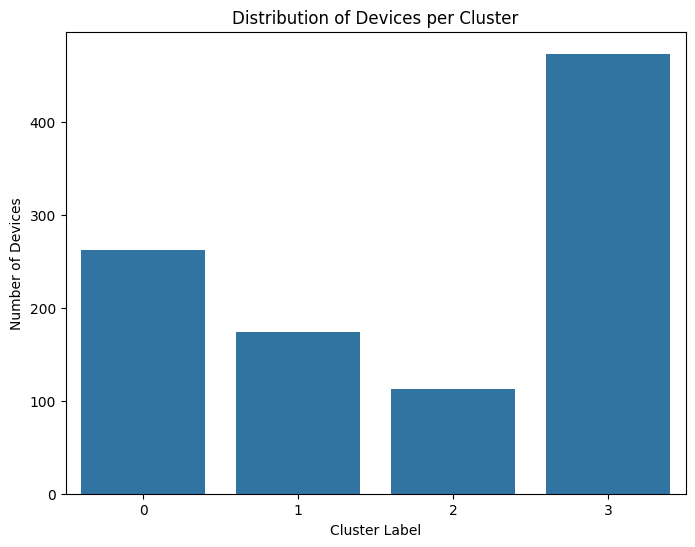

In [31]:
# Visualize the distribution of devices per cluster using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster_label_encoded', data=data)
plt.title('Distribution of Devices per Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Devices')
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler

# Get the centroids of the clusters from the fitted KMeans model
centroids_scaled = kmeans.cluster_centers_

# The centroids are in the scaled and one-hot encoded space.
# To interpret them, we need to transform them back to the original scale for numerical features
# and understand the values for the one-hot encoded features.

# Define the original numerical features
numerical_features = ['cpu_utilization', 'mem_utilization', 'packet_loss', 'temperature']
categorical_features = ['version']

# Create and fit a new scaler ONLY on the original numerical features
scaler_numerical = StandardScaler()
scaler_numerical.fit(data[numerical_features])


# The number of numerical features is the length of the numerical_features list.
num_features_count = len(numerical_features)

# Inverse transform the numerical part of the centroids using the new scaler
centroids_numerical_original = scaler_numerical.inverse_transform(centroids_scaled[:, :num_features_count])

# Create a DataFrame for better visualization of the numerical centroids
centroids_df_numerical = pd.DataFrame(centroids_numerical_original, columns=numerical_features)

print("Numerical Centroids (Original Scale):")
display(centroids_df_numerical)


Numerical Centroids (Original Scale):


,cpu_utilization,mem_utilization,packet_loss,temperature
0,55.383715,66.650843,1.060040,42.791116
1,52.184483,32.920000,0.304154,37.350744
2,41.817215,32.342799,4.045704,42.913531
3,58.698726,35.264726,1.078923,42.616240


In [33]:
# Add the cluster assignments to the original data
data_with_clusters = data.copy()
data_with_clusters['cluster'] = kmeans.labels_

# Create a table counting the number of devices per cluster and per version
categorical_table = data_with_clusters.groupby(['cluster', 'version']).size().unstack(fill_value=0)

# Format the column headers to show only one decimal
categorical_table.columns = [f"{col:.1f}" for col in categorical_table.columns]

print("Number of Devices per Cluster and Version:")
display(categorical_table)

Number of Devices per Cluster and Version:


,16.9,17.3,17.6,19.2,21.1,21.2,21.3
cluster,,,,,,,
0,44,43,47,0,38,49,41
1,29,29,29,0,29,29,29
2,33,9,13,20,13,16,9
3,73,86,73,0,86,70,85


# 📊 Cluster Analysis of Devices

---

## 🔹 Cluster 0
**Numerical profile:**
- **CPU:** ~55% (medium)  
- **Memory:** ~67% (medium)  
- **Packet loss:** ~1% (low)  
- **Temperature:** ~42.8°C (high)  

**Categorical profile:**
- Dominant version: **21.2**

✅ **Interpretation:**  
Healthy devices with **higher memory consumption**, running on version **21.2**. They may be handling heavier workloads but remain stable (low packet loss). Likely **production devices under normal load**.

---

## 🔹 Cluster 1
**Numerical profile:**
- **CPU:** ~52% (medium)  
- **Memory:** ~33% (low)  
- **Packet loss:** ~0.3% (very low)  
- **Temperature:** ~37.3°C (medium)  

**Categorical profile:**
- Dominant version: **21.2**

✅ **Interpretation:**  
This is the **most stable/healthy cluster**. Low memory use, minimal packet loss, and cooler devices. Likely **efficient configurations or lightly loaded devices** on version 21.2. This could be the **baseline/benchmark group**.

---

## 🔹 Cluster 2
**Numerical profile:**
- **CPU:** ~42% (medium)  
- **Memory:** ~32% (low)  
- **Packet loss:** ~4% (**very high**)  
- **Temperature:** ~42.9°C (high)  

**Categorical profile:**
- Dominant version: **16.9**

⚠️ **Interpretation:**  
This cluster is **concerning**. Despite low CPU/Memory, packet loss is **very high**. Likely represents devices with network reliability issues. Possible **high temperature & version 16.9** causing instability.

---

## 🔹 Cluster 3
**Numerical profile:**
- **CPU:** ~59% (high)  
- **Memory:** ~35% (medium)  
- **Packet loss:** ~1% (low)  
- **Temperature:** ~42.6°C (high)  

**Categorical profile:**
- Dominant version: **17.3**

✅ **Interpretation:**  
Devices in this cluster are working **harder (higher CPU)** but remain stable in networking. They run version **17.3**, an intermediate stable release. Likely devices under **higher compute demand without major faults**.

---

# 🌎 Overall Insights

- **Version dependency is clear:**
  - **21.2 (Clusters 0 & 1):** Stable, low packet loss → Best performing.  
  - **16.9 (Cluster 2):** Worst performance, high packet loss → Upgrade needed.  
  - **17.3 (Cluster 3):** Stable, but high CPU usage.  

- **Performance spectrum:**
  - 🟢 **Best cluster:** Cluster 1 (cool, efficient, minimal loss).  
  - 🔴 **At-risk cluster:** Cluster 2 (older devices, severe packet loss).  
  - 🟡 **Heavier load:** Clusters 0 & 3 (higher CPU/memory, still stable).  

---

# ✅ Actionable Recommendations
1. **Upgrade devices on version 16.9 (Cluster 2).**  
2. **Monitor memory in Cluster 0** to prevent saturation.  
3. **Use Cluster 1 as the healthy baseline** for future benchmarking.  